Your friend Wenceslao wants to sell his house. He's heard you've become a
counselor to the spanish government and has asked you for advice.
He'd like to know how valuable his house is.
This is how it looks like:

{'LotFrontage': 67,
'LotArea': 12354,
'CentralAir': 'Y',
'GarageArea': 528,
'PoolArea': 0}

First part: do some exploratory data analysis (EDA). Plot variables you are interested in and
compute statistics of interest. Try to identify different distributions in the variables.
Remember that variables might somehow follow distributions we've seen in class, but not exactly at all.
Many variables have distributions that we haven't seen in class (you can look at Pareto or
exponential distributions).

Second part: try to find correlations (continuous variables) and differences in mean (discrete variables)
with the SalePrice, what things are more correlated with it? Could you give some advice to your friend
Wenceslao on what price to set? No need to be super comprehensive here, there are many features. Just
take some variables you are interested in and look at them :)

Bonus question - 1
Remember we talked on the first class about feature engineering: the art of extracting
additional features out of the existing data. Looking at this data, can you come up with
any idea of extra features that could be extracted?

Bonus question - 2 
On the first part you probably found (almost) no variable that followed a normal distribution
if we are to be strict. There are some tricks that we can use to turn skewed distributions
into normal distributions for convenience. Look at 1stFlrSF or LotArea. Do you think you
can pre-process them to turn them into normal distributions? If you manage to do so,
why do you think it could make sense to turn them into a normal distribution?



Source of the data:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import calendar
sns.set()

SMALL_SIZE = 8
MEDIUM_SIZE = SMALL_SIZE + 2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes\n",
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title\n",
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels\n",
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels\n",
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels\n",
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize\n",
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title\n",
plt.rc('figure', dpi=120)

In [7]:
data = pd.read_csv('../datasets/housing.csv')
print(data.shape)
data.head()

(1459, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
continuous_variables = []
categorical_variables = []
threshold = 0.05
for column in data:
    if column in ['Id']:
        continue
    
    _data = data.loc[~data[column].isin([0, 1950])]
    categorical = (_data[column].nunique()/_data[column].count()) < threshold #
    if categorical or column in ['PoolQC', 'MiscFeature']:
        categorical_variables.append(column)
    else:
        continuous_variables.append(column)
        

/Users/javiermas/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


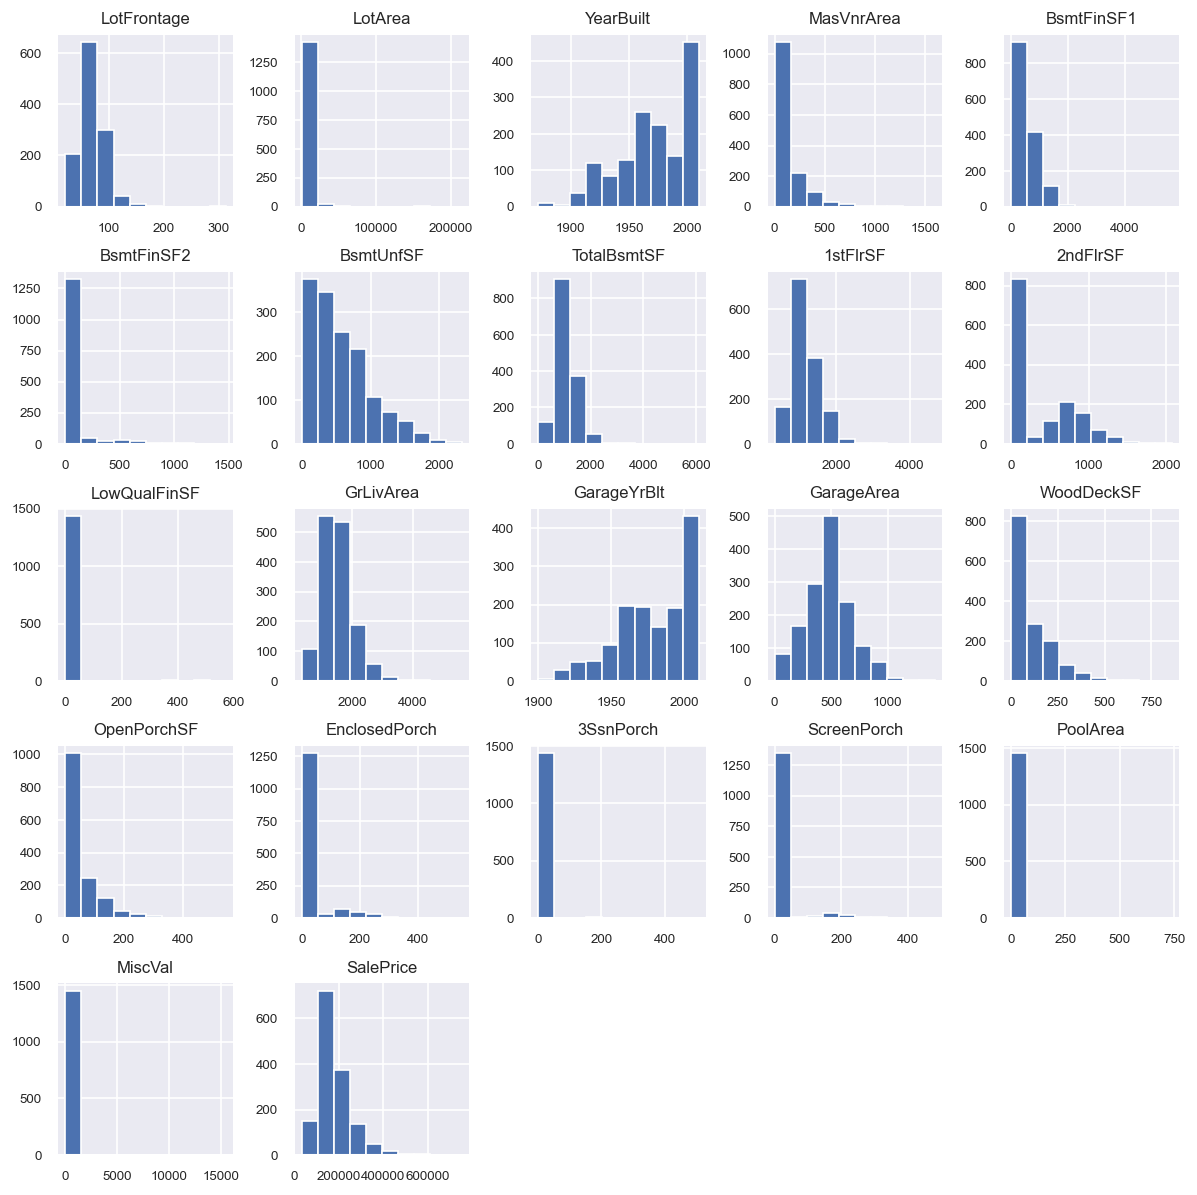

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax_ = data[continuous_variables].hist(ax=ax)
plt.tight_layout()

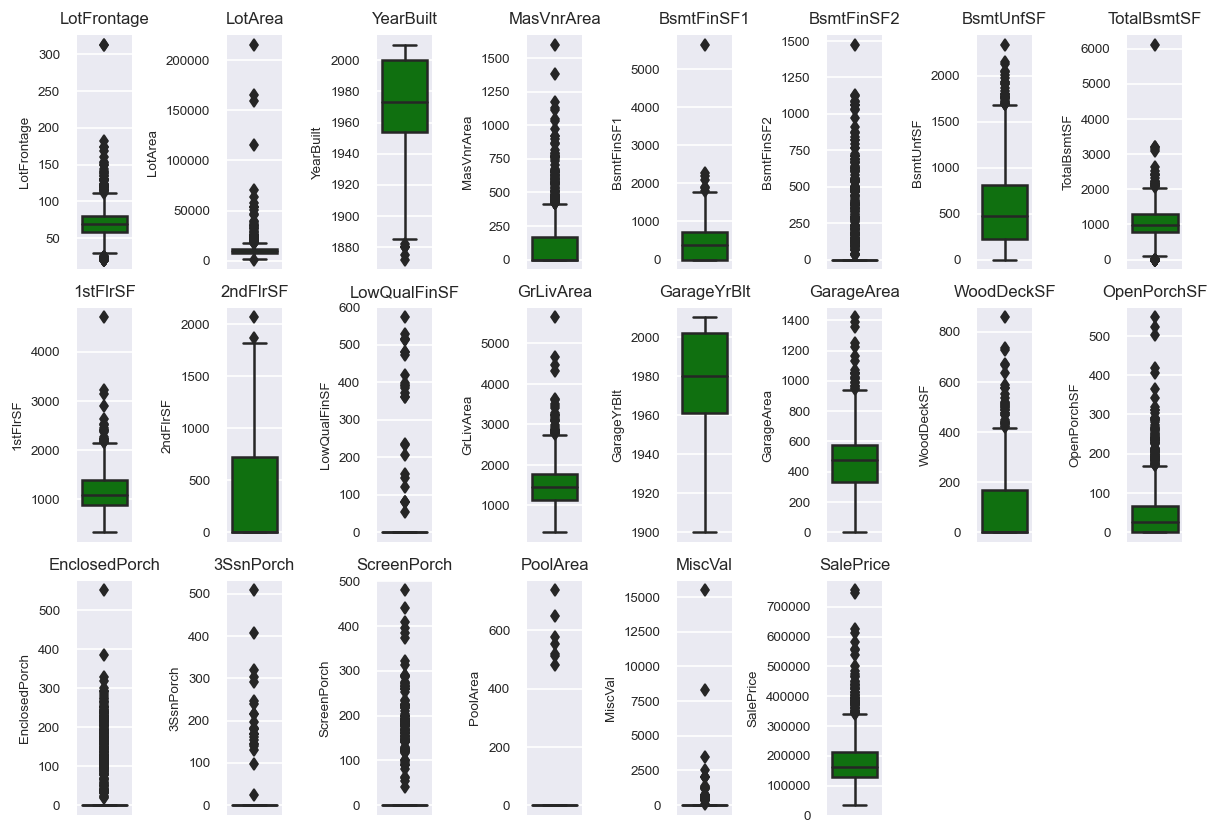

In [39]:
n_cols =8
n_rows = int(np.ceil(len(continuous_variables) / n_cols))
fig = plt.figure(figsize=(10, 7))
for i, variable in enumerate(continuous_variables):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    sns.boxplot(data[variable], color='green', orient='v')    
    #ax.set_xticklabels(counts.index)#, rotation=45)
    ax.set_title(variable)
    
plt.tight_layout()

Findings:
* Many variables with a 0 value. Probably indicates the absence of the feature on the house: no garange, no porch, no wood deck... We could generate features with this. ScreenPorch seems to have very little information on the > 1 values.
* Many normal-looking distributions skewed to the right: lot frontage, 1st floor surface, even sale price. Makes sense, many of these variables would be truncated at 0, hence the skewness.

/Users/javiermas/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """


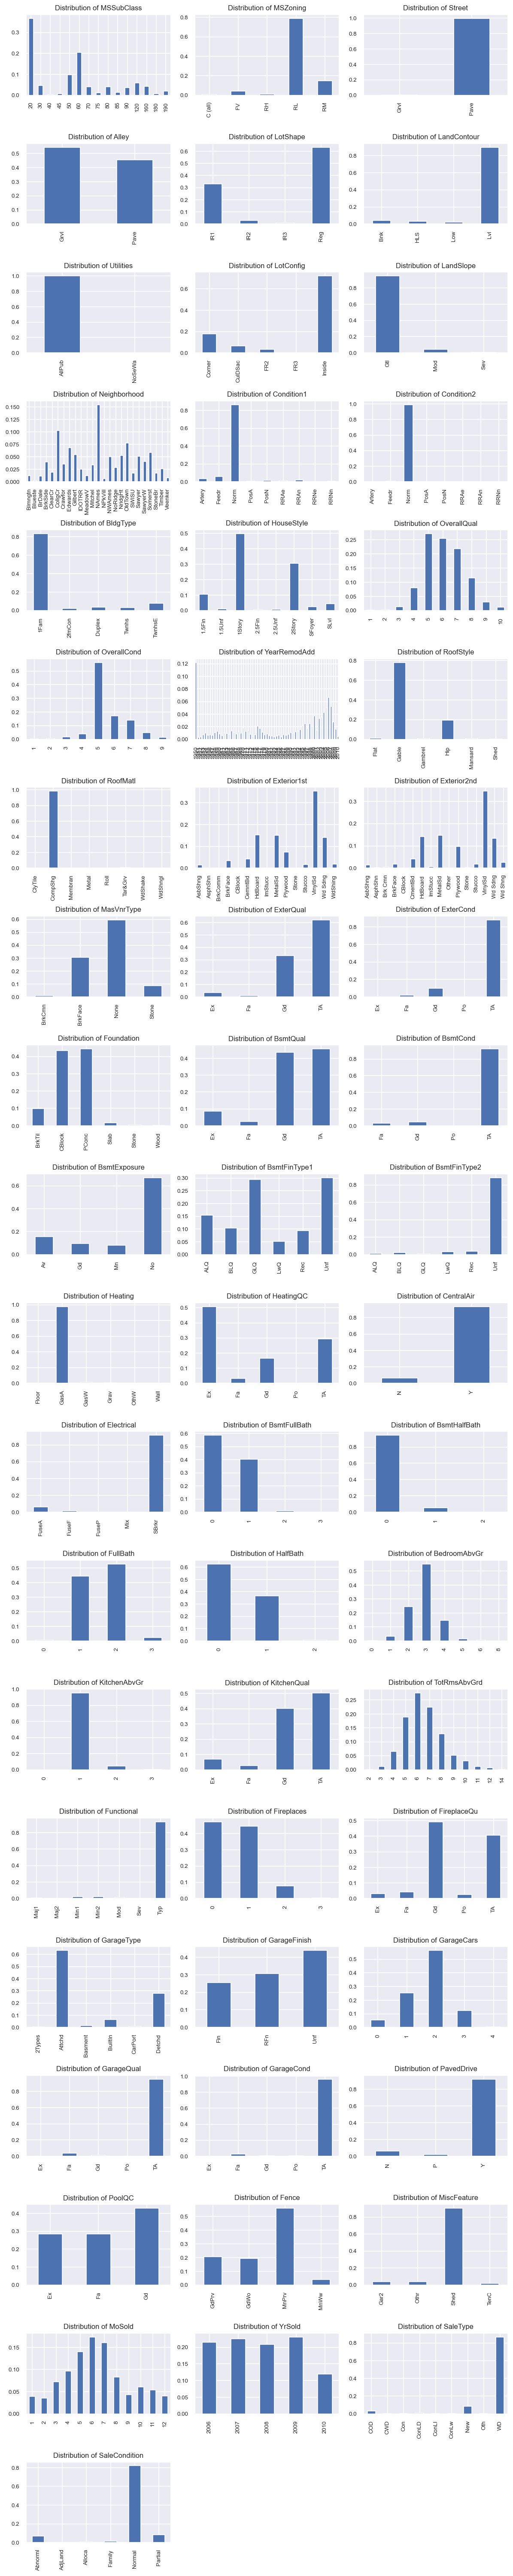

In [30]:
n_cols = 3
n_rows = np.ceil(len(categorical_variables) / n_cols)
fig = plt.figure(figsize=(10, 50))
for i, variable in enumerate(categorical_variables):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    counts = data[variable].dropna().value_counts(normalize=True).sort_index()
    counts.plot(kiind='bar', ax=ax)
    ax.set_xticklabels(counts.index)#, rotation=45)
    ax.set_title(f'Distribution of {variable}')
    
plt.tight_layout()

Findings:
* Maaaany categorical variables, many more than continuous.
* On top of that, they come on different types: binary (central air), non-ordinal (Fence) and ordinal (Fireplaces, Kitchen quality).
* It would be good to check which ones have an impact on the sale price not to end up with many features for such small set of observations.

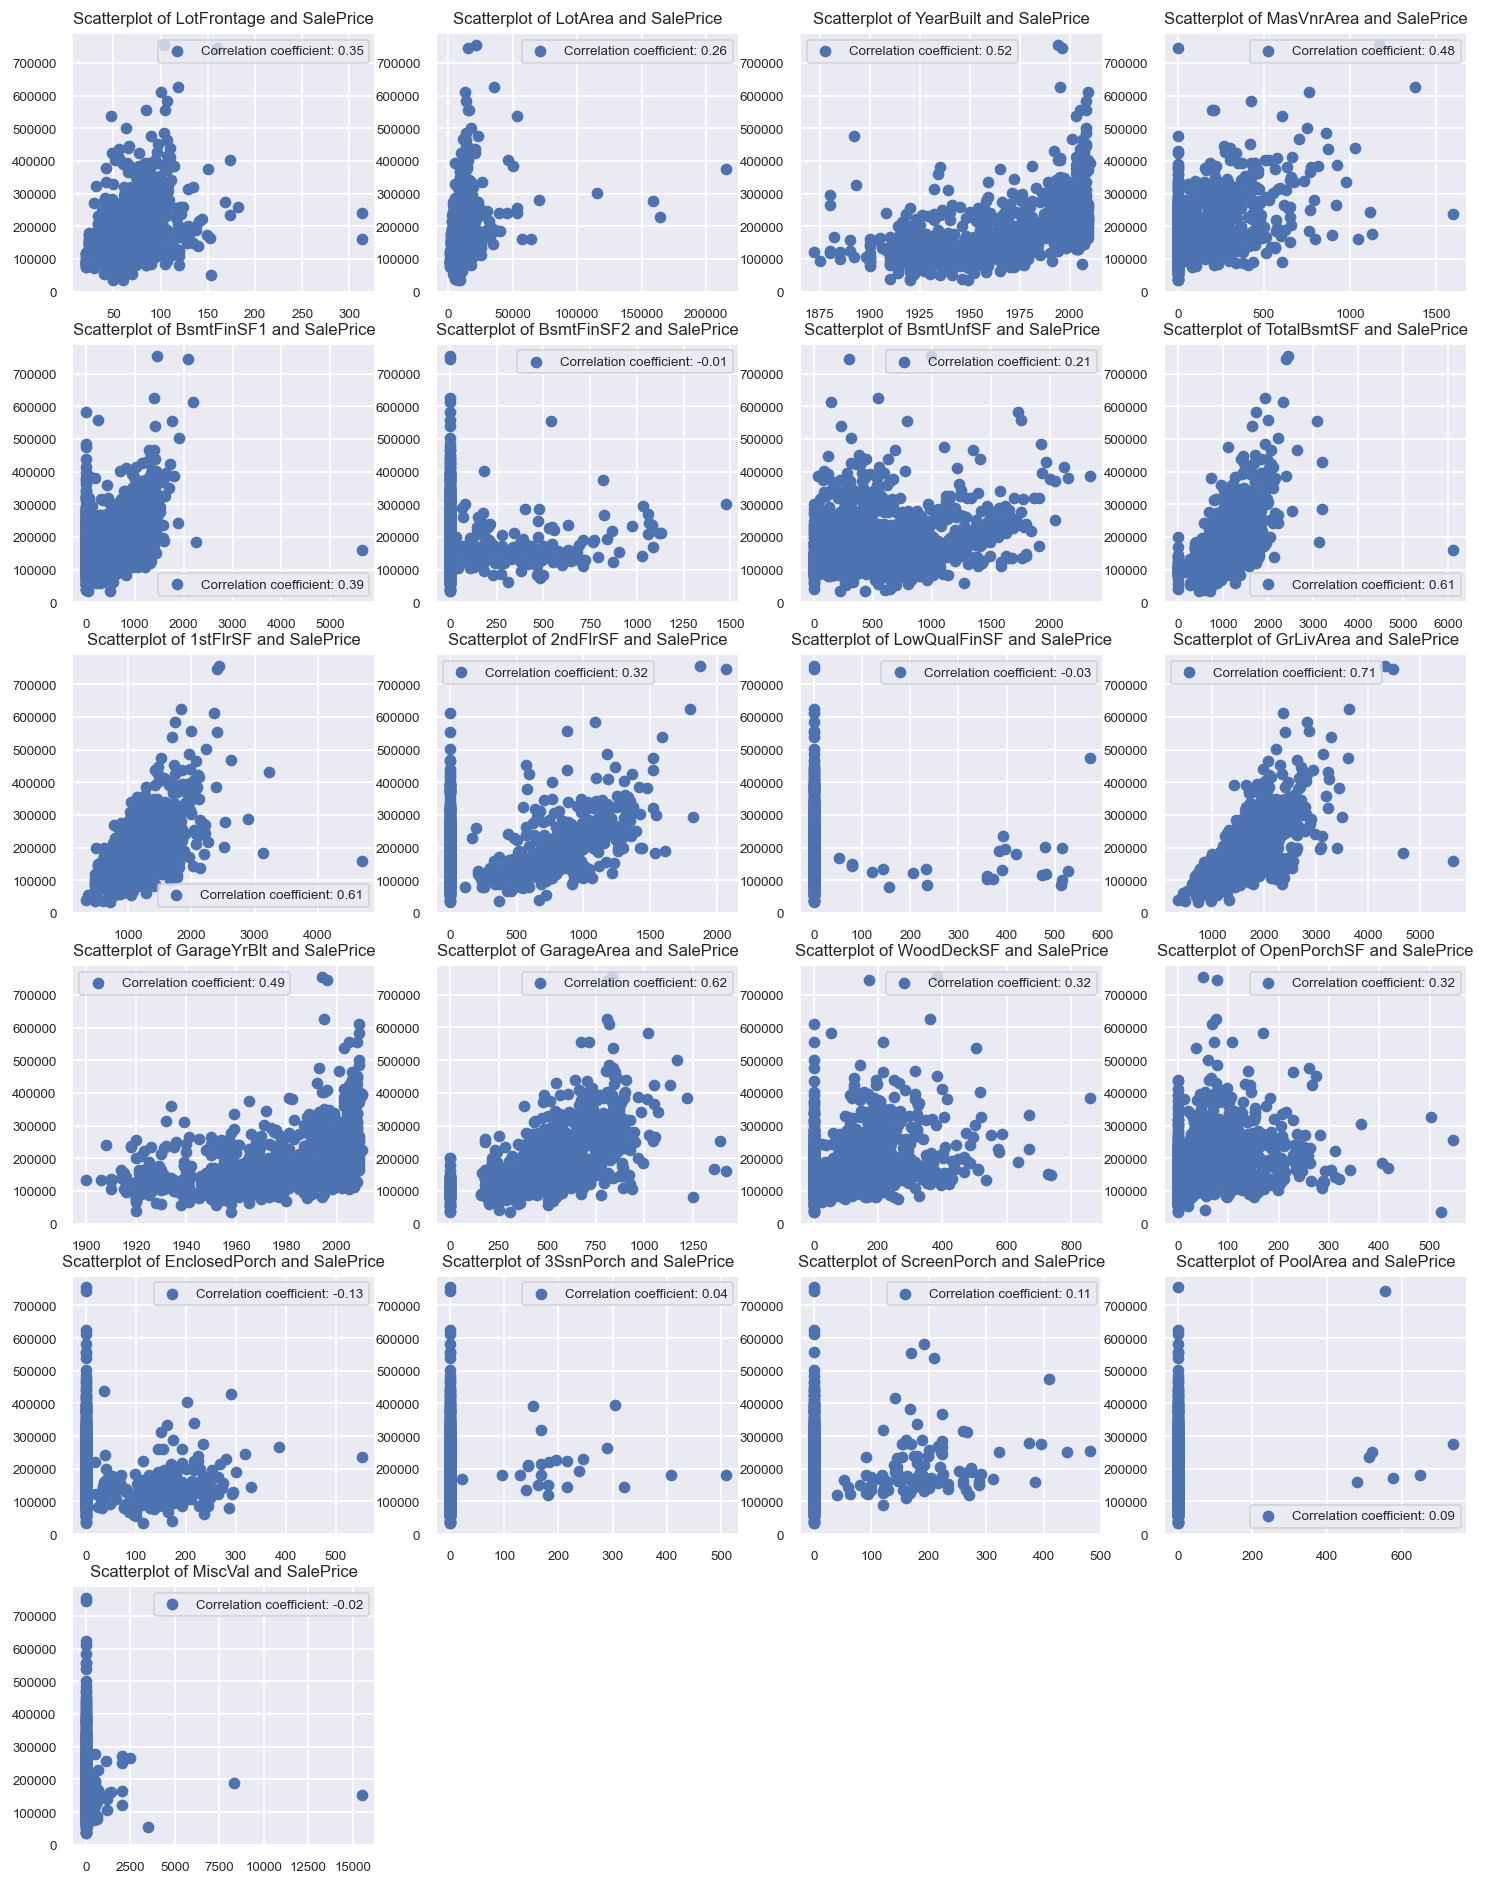

In [44]:
n_cols = 4
n_rows = int(np.ceil(len(continuous_variables)/ n_cols))
fig = plt.figure(figsize=(15, 20))
target = 'SalePrice'
for i, variable in enumerate(continuous_variables):
    if variable == 'SalePrice':
        continue
        
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    _data = data[[variable, target]].dropna().copy()
    correlation = _data[variable].corr(_data[target]).round(2)
    ax.scatter(_data[variable], _data[target], label=f'Correlation coefficient: {correlation}')
    plt.title(f'Scatterplot of {variable} and {target}')
    plt.legend()

In [82]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011081,-0.010674,-0.033144,-0.028403,0.013663,-0.013530,-0.021659,-0.050583,-0.005486,-0.006105,-0.007816,-0.015823,0.009918,0.005770,-0.044294,0.007988,0.001902,-0.020272,0.005105,0.006426,0.037802,0.002852,0.027384,-0.020231,0.000613,0.016720,0.017759,-0.030009,-0.000482,0.002720,-0.046698,0.001203,0.057021,-0.005527,0.021472,0.001134,-0.022348
MSSubClass,0.011081,1.000000,-0.386371,-0.139763,0.032620,-0.059169,0.027688,0.040671,0.022874,-0.069968,-0.065683,-0.140735,-0.238675,-0.252032,0.307946,0.046461,0.074795,0.003400,-0.002360,0.131542,0.177306,-0.023420,0.281704,0.040415,-0.045690,0.085223,-0.040077,-0.098646,-0.012666,-0.006101,-0.012077,-0.043838,-0.026061,0.008275,-0.007519,-0.013517,-0.021313,-0.084408
LotFrontage,-0.010674,-0.386371,1.000000,0.426146,0.251639,-0.059103,0.123314,0.088957,0.193426,0.233621,0.049872,0.132669,0.392104,0.457343,0.080223,0.038456,0.402797,0.100893,-0.007259,0.198750,0.053467,0.263192,-0.006092,0.352140,0.266638,0.070422,0.285735,0.345034,0.088464,0.151973,0.010662,0.070019,0.041356,0.206161,0.003822,0.011266,0.007546,0.351818
LotArea,-0.033144,-0.139763,0.426146,1.000000,0.105816,-0.005921,0.014456,0.013699,0.104246,0.214298,0.111211,-0.002652,0.261008,0.299792,0.050941,0.004794,0.263229,0.158296,0.048078,0.126207,0.014359,0.119672,-0.017758,0.189985,0.271571,-0.025085,0.154838,0.180376,0.171828,0.084776,-0.018295,0.020438,0.043196,0.077682,0.037906,0.001127,-0.014378,0.264031
OverallQual,-0.028403,0.032620,0.251639,0.105816,1.000000,-0.091975,0.572806,0.550823,0.411896,0.239696,-0.059135,0.308180,0.537901,0.476414,0.295527,-0.030435,0.593054,0.111083,-0.040163,0.550749,0.273475,0.101686,-0.183896,0.427481,0.396842,0.548107,0.600707,0.562048,0.238933,0.308819,-0.113960,0.030365,0.064875,0.065163,-0.031356,0.070855,-0.027310,0.791155
OverallCond,0.013663,-0.059169,-0.059103,-0.005921,-0.091975,1.000000,-0.374426,0.072778,-0.127465,-0.044865,0.040728,-0.137463,-0.170145,-0.142660,0.028425,0.025716,-0.078916,-0.053817,0.118376,-0.193001,-0.059741,0.012756,-0.086828,-0.058123,-0.022442,-0.326775,-0.186533,-0.152157,-0.002214,-0.032627,0.071012,0.025719,0.055306,-0.001885,0.066660,-0.004446,0.042698,-0.076668
YearBuilt,-0.013530,0.027688,0.123314,0.014456,0.572806,-0.374426,1.000000,0.594405,0.315386,0.248697,-0.049493,0.149499,0.390945,0.280970,0.010759,-0.184107,0.198523,0.186872,-0.038481,0.467708,0.242057,-0.070531,-0.175222,0.096032,0.146800,0.828396,0.538763,0.479739,0.224270,0.188861,-0.388087,0.031250,-0.050730,0.004875,-0.032666,0.013136,-0.012595,0.522517
YearRemodAdd,-0.021659,0.040671,0.088957,0.013699,0.550823,0.072778,0.594405,1.000000,0.179964,0.129005,-0.067628,0.181038,0.291620,0.241173,0.139866,-0.062370,0.287784,0.119932,-0.012218,0.439802,0.183784,-0.040671,-0.149521,0.191632,0.113115,0.642108,0.420557,0.371547,0.206182,0.226344,-0.193783,0.045353,-0.038612,0.005865,-0.011064,0.021185,0.035311,0.507782
MasVnrArea,-0.050583,0.022874,0.193426,0.104246,0.411896,-0.127465,0.315386,0.179964,1.000000,0.264469,-0.072443,0.114562,0.363733,0.344233,0.174739,-0.069127,0.390711,0.085017,0.026581,0.276560,0.201207,0.102898,-0.037698,0.280839,0.248800,0.253296,0.364381,0.373220,0.159470,0.125715,-0.110363,0.018752,0.061367,0.011697,-0.029242,-0.005720,-0.007852,0.477326
BsmtFinSF1,-0.005486,-0.069968,0.233621,0.214298,0.239696,-0.044865,0.248697,0.129005,0.264469,1.000000,-0.050328,-0.495248,0.522127,0.445415,-0.136878,-0.064604,0.207859,0.649025,0.067281,0.057899,0.003756,-0.107281,-0.081175,0.044529,0.259541,0.154376,0.224342,0.297245,0.203910,0.111790,-0.102581,0.026382

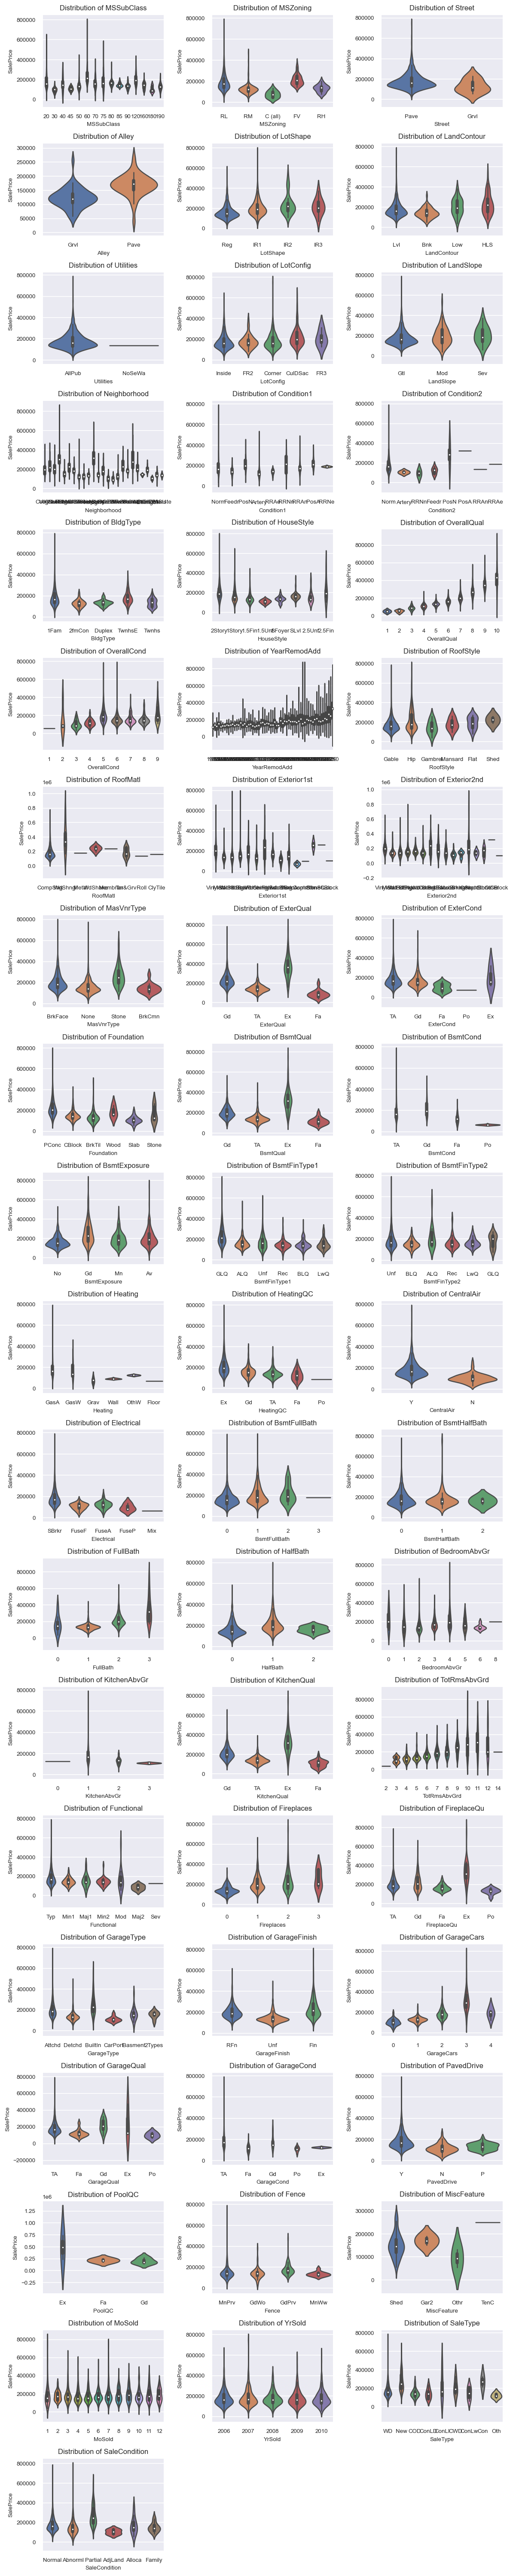

In [87]:
n_cols = 3
n_rows = int(np.ceil(len(categorical_variables) / n_cols))
fig = plt.figure(figsize=(10, 50))
for i, variable in enumerate(categorical_variables):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    sns.violinplot(data[variable], data['SalePrice'], ax=ax)
    ax.set_title(f'Distribution of {variable}')
    
plt.tight_layout()

/Users/javiermas/py37/lib/python3.7/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


<AxesSubplot:>

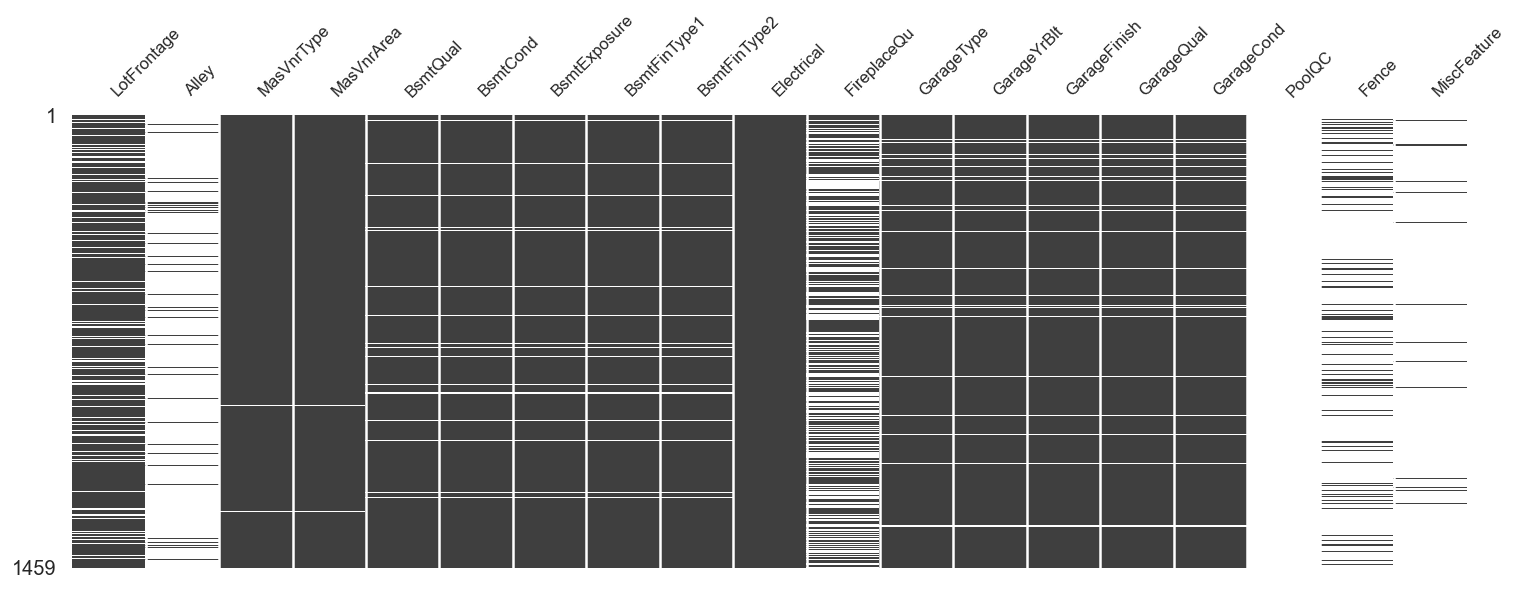

In [67]:
import missingno as msno

cols_with_missing = [col for col in data if data[col].isnull().sum() > 0]

fig, ax = plt.subplots(figsize=(15, 5))
msno.matrix(data[cols_with_missing], ax=ax, fontsize=10)

Many variables are not missing at random (MAR). For instance, missing values in the Alley variable are explained by the house not being accessed via an alley. Missing values in basement (or garange) variables are explained by the house not having a basement. Imputing these with statistical methods would be a mistake. It's important to know the reason behing the missingness. However, LotFrontage seems to be missing at random, so maybe we could use some estimate to impute it. 

In [68]:
data[cols_with_missing].isnull().mean()

LotFrontage     0.177519
Alley           0.938314
MasVnrType      0.005483
MasVnrArea      0.005483
BsmtQual        0.025360
BsmtCond        0.025360
BsmtExposure    0.026045
BsmtFinType1    0.025360
BsmtFinType2    0.026045
Electrical      0.000685
FireplaceQu     0.472241
GarageType      0.055517
GarageYrBlt     0.055517
GarageFinish    0.055517
GarageQual      0.055517
GarageCond      0.055517
PoolQC          0.995202
Fence           0.808088
MiscFeature     0.963674
dtype: float64

In [69]:
# Data processing

In [97]:
feature_matrix = data.copy()

# Deal with missing values
missing_informative_variables = [
    'BsmtQual',
    'BsmtCond',
]
for col in missing_informative_variables:
    feature_matrix[col] = feature_matrix[col].fillna('NA')

feature_matrix['LotFrontage'].fillna(feature_matrix['LotFrontage'].mean())

# Make variable dummies
categorical_features = pd.get_dummies(feature_matrix[categorical_variables])
feature_matrix = pd.concat([categorical_features, feature_matrix.drop(columns=categorical_variables)])

skewed_variables = []

# Transforming to log scale
skewed_variables = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea'
]
for var in skewed_variables:
    feature_matrix[var] = np.log(feature_matrix[var] + 1)
    
print(feature_matrix.shape)
feature_matrix.head()

(2918, 292)


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60.0,7.0,5.0,2003.0,1.0,0.0,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20.0,6.0,8.0,1976.0,0.0,1.0,2.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60.0,7.0,5.0,2002.0,1.0,0.0,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70.0,7.0,5.0,1970.0,1.0,0.0,1.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60.0,8.0,5.0,2000.0,1.0,0.0,2.0,1.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
